## Effects of Rocks on Regolith Temperatures

Regolith temperatures at night on the Moon may be influenced by rocks through both conduction and radiation. Heat conduction from the rock to the regolith is represented by

$$Q_\textrm{cond} = k \frac{T_\textrm{rock}-T_\textrm{reg}}{x}$$

where $k$ is the conductivity of the regolith, and $x$ is the distance from the rock. This conducted heat flux can be compared to the radiant heat flux of the regolith

$$Q_\textrm{rad} = \epsilon\sigma T_\textrm{reg}^4$$

To a first approximation, we model rock and regolith temperatures separately, as in *Bandfield et al.* (2011) and *Vasavada et al.* (2012). For example, at midnight, $T_\textrm{reg} \approx$ 100 K, and $T_\textrm{rock} \approx$ 215 K.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import planetRad as pr
%matplotlib inline

In [2]:
k = 1.0e-3                # thermal conductivity of regolith
emissivity = 0.95         # emissivity of regolith
T_reg = 100.0             # regolith temperature [K]
T_rock = 215.0            # rock temperature [K]
x = np.logspace(-4,0,100) # distance from rock [m]

In [3]:
Q_cond = k*(T_rock-T_reg)/x    # conducted heat flux from rock [W.m-2]
Q_rad = pr.sigma*T_reg**4      # radiant heat flux from regolith [W.m-2]
f = Q_cond/Q_rad-1             # equal fluxes at f=0
xmin = x[f==np.min(np.abs(f))] # distance of equal fluxes [m]

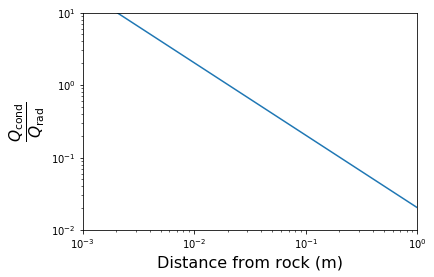

In [4]:
plt.loglog(x,Q_cond/Q_rad)
font = {'family' : 'serif',
        'size'   : 16}
plt.xlabel('Distance from rock (m)',fontsize=16)
plt.ylabel(r'$\frac{Q_\mathrm{cond}}{Q_\mathrm{rad}}$',fontsize=22)
plt.axis([1e-3,1,1e-2,10])
matplotlib.rc('font', **font)
plt.show()

This shows that the conducted flux from the rock is important in the surface energy budget at distances $x \lesssim 2$ cm, where it is comparable to the radiant flux, i.e., $Q_\textrm{cond} = Q_\textrm{rad}$. At smaller distances, the temperature is increased by an amount $\delta T$ given by

$$k\frac{T_\textrm{rock}-(T_\textrm{reg}+\delta T)}{x} \approx \epsilon \sigma (T_\textrm{reg}+\delta T)^4$$

Since $\delta T \ll T_\textrm{reg}$, we can neglect terms in $\delta T^2$ and higher order, and approximate by Taylor expansion

$$(T_\textrm{reg}+\delta T)^4 \approx T_\textrm{reg}^4 + 4T_\textrm{reg}^3\delta T + \ldots $$

Then solve

$$ (k/x)T_\textrm{rock} - (k/x)T_\textrm{reg} - \epsilon \sigma T_\textrm{reg}^4 = (4\epsilon \sigma T_\textrm{reg}^3 + k/x)\delta T $$

$$ Q_\textrm{cond} - Q_\textrm{rad} \approx (4\epsilon \sigma T_\textrm{reg}^3 + k/x)\delta T $$

such that

$$ \delta T \approx \frac{Q_\textrm{cond}-Q_\textrm{rad}}{4\epsilon \sigma T_\textrm{reg}^3 + k/x} $$

In [5]:
deltaT = (Q_cond - Q_rad)/(4*emissivity*pr.sigma*T_reg**3 + k/x)
#k = 1e-2
#Q_cond = k*(T_rock-T_reg)/x
#Q_rad = pr.sigma*T_reg**4
#deltaT_high = (Q_cond - Q_rad)/(4*emissivity*pr.sigma*T_reg**3 + k/x)
#k = 1e-4
#Q_cond = k*(T_rock-T_reg)/x
#Q_rad = pr.sigma*T_reg**4
#deltaT_low = (Q_cond - Q_rad)/(4*emissivity*pr.sigma*T_reg**3 + k/x)

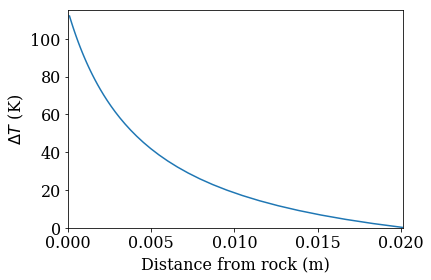

In [6]:
plt.figure
matplotlib.rc('font', **font)
plt.plot(x, deltaT) #,x,deltaT_high,x,deltaT_low)
#plt.xticks(np.arange(0,10,0.25),np.arange(0,10,0.25))
#plt.axis([0,10,0,120])
plt.ylim([0,T_rock-T_reg])
plt.xlim([0,xmin])
plt.xlabel('Distance from rock (m)')
plt.ylabel('$\Delta T$ (K)')
plt.show()

Conduction increases the area of enhanced emission by a factor $\delta A/A_\textrm{rock} \sim 2x/R$, where $R$ is the rock radius. For example, a 1-m rock affecting a region extending $\sim 2$ cm, has an emitting area $\sim 4\%$ larger than the rock itself. However, this conducted heat is taken away from the rock, so that its temperature must also decrease more rapidly during the night. Therefore, conduction by regolith is not expected to lead to significant errors in rock abundance estimates, for rocks $>$ 1 m.

Given a rock abundance (i.e., area fraction) $C$ and rock diameter $D=2R$, the mean distance between rocks is

$$ d \sim \left(\frac{A_\mathrm{rock}}{C}\right)^\frac{1}{2} - D = \left(\frac{1}{\sqrt{C}} - 1\right)D $$

Typical rock concentrations on the Moon are $C \approx 1\%$ (*Bandfield et al.*, 2011). At a concentration of 1%, meter-sized rocks are typically spaced by $d \approx 18$ m. This means that the average distance to a rock on the lunar surface is $d/4 \sim 4.5$ m, and the fractional area of regolith affected by heat conducted from rocks is $ (\delta A/A_\textrm{rock})C = 2xC/R \approx 4\times 10^{-4}$.

In [7]:
#####################
# Example calculation
#####################

R = 1.0                       # Rock radius
C = 1.0e-2                    # Rock abundance
d = 2*R/np.sqrt(C) - 2*R      # Mean distance between rocks
A_cond = 2*np.float(xmin)*C/R # fractional area heated by conduction from rocks

In [8]:
print('Average distance between rocks: {:.1f} m'.format(d))
print('Fractional area of regolith warmed by conduction from rocks: {:.2e}'.format(A_cond))

Average distance between rocks: 18.0 m
Fractional area of regolith warmed by conduction from rocks: 4.02e-04
